### 목표
- 붓꽃의 꽃잎 길이, 꽃잎 너비, 꽃받침 길이, 꽃받침 너비 특징을 활용해 3가지 품종 분류
- KNN 모델의 이웃의 숫자를 조절해보자(하이퍼파라미터 튜닝)
- petal:꽃잎 / sepal:꽃받침

In [1]:
#사이킷런에서 제공하는 데이터 세트 생성하는 모듈
from sklearn.datasets import load_iris

In [3]:
iris_data=load_iris()
iris_data #Bunch class object (딕셔너리와 유사함)

In [4]:
#iris_data의 키값
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
#'DESCR' 키에는 데이터셋에 대한 설명
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
#target_names: 예측하고자 하는 붓꽃 품종의 이름을 문자열 배열로 가지고 있음
print(iris_data['target_names'])

['setosa' 'versicolor' 'virginica']


In [7]:
#feature_names: 각 특성을 설명하는 문자열
print(iris_data['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
# 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
#targetd은 1차원 배열
#'setosa' : 0, 'versicolor' : 1, 'virginica' : 2
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 데이터셋 구하기
- 문제와 답데이터 분리
- 훈련세트와 평가세트로 분리
    - 훈련세트/데이터: 머신러닝 모델을 학습할 때 사용
    - 평가세트/데이터: 모델이 얼마나 잘 작동하는지 측정하는데 사용

In [10]:
#라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#문제데이터 2차원 데이터프레임 생성
#컬럼 이름 설정
#iris_df라는 변수에 담아주기
iris_df=pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])

In [12]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
#문제와 답 데이터로 분리
X= iris_df.values
y=iris_data['target']

In [17]:
from sklearn.model_selection import train_test_split

In [54]:
#훈련세트와 평가세트로 분리
#train_test_split : 데이터를 나누기 전에 유사 난수 생성기를 사용해 데이터셋을 무작위로 섞어준다
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=55)

#random_states 매개변수 : 함수를 여러번 실행해도 결과가 똑같이 나오게 된다
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(105, 4)

(105,)

(45, 4)

(45,)

### 모델링

In [25]:
#사이킷런 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [47]:
#모델 생성
knn_model=KNeighborsClassifier(n_neighbors=3)
#훈련/학습
#모델명.fit(훈련용 문제,훈련용 답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

In [48]:
#예측
#모델명.predict(테스트용 문제)
predict_data=knn_model.predict(X_test)
#평가하기
metrics.accuracy_score(predict_data,y_test)

0.9555555555555556

### 하이퍼파라미터 튜닝

In [58]:
parameter=[]
test_list=[]
train_list=[]

for k in range(1, 105, 2):
    #모델 생성
    knn=KNeighborsClassifier(n_neighbors=k)
    #학습
    knn.fit(X_train, y_train)
    #예측
    pre=knn.predict(X_test)
    #평가
    test_score=metrics.accuracy_score(pre,y_test)
    #test_list라는 리스트에 평가값을 담아주기
    test_list.append(test_score)
    
    #train_list
    #예측
    train_pre=knn.predict(X_train)
    #평가
    train_score=metrics.accuracy_score(train_pre,y_train)
    train_list.append(train_score)

In [56]:
test_df=pd.DataFrame({'하이퍼파라미터':train_list,'정확도':test_list})
test_df

,하이퍼파라미터,정확도
0,1,0.955556
1,3,0.955556
2,5,0.977778
3,7,0.955556
4,9,0.955556
5,11,0.955556
6,13,0.955556
7,15,0.955556
8,17,0.955556
9,19,0.955556


In [60]:
#한글 폰트 설정
from matplotlib import rc
rc('font', family='Malgun Gothic')

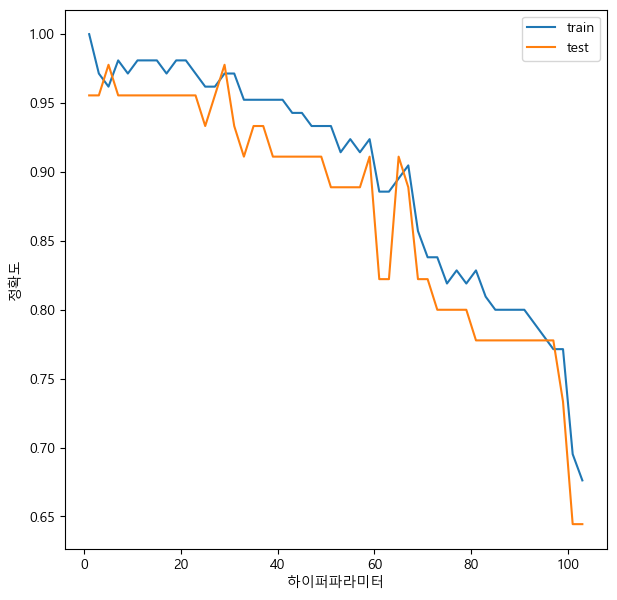

In [61]:
plt.figure(figsize=(7,7))
x=range(1, 105, 2)
plt.plot(x,train_list, label='train')
plt.plot(x,test_list, label='test')

plt.legend()
plt.xlabel('하이퍼파라미터')
plt.ylabel('정확도')

plt.show()